# Decision Tree Project
## Members: Eric Scoggins, Mariam Irfan, Ross Cado, Vaibhav Ashok

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import scatter_matrix, parallel_coordinates

### Now we import the dataset "Bank_Personal_Loan_Modelling".

The data set includes 5000 observations with fourteen variables. The variables are personal loan, securities account, CD account, online banking, credit card, age, experience, income, CC avg, mortgage, family, education, ID, and Zip code.  

In [117]:
bank_df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 'Data')
bank_df.rename(columns={'ZIP Code': 'ZIPCode', 'Personal Loan': 'PersonalLoan',
                       'Securities Account': 'SecuritiesAccount', 'CD Account': 'CDAccount'}, inplace=True)

### The next command shows the first 5 rows of the dataset. 

In [118]:
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Dataset Description

In [119]:
print('Dataset Shape: ', bank_df.shape)
print('')
print('Data Types: ')
print('')
print(bank_df.dtypes)
print('')
print('Data Analysis: ')

Dataset Shape:  (5000, 14)

Data Types: 

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

Data Analysis: 


In [120]:
bank_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Checking for missing values
Removes any rows with missing values

In [121]:
reduced_df = bank_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))
del reduced_df

Number of rows after removing rows with missing values:  5000


### Data Visualization before model fit

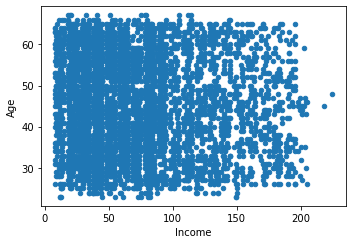

In [122]:
bank_df.plot.scatter(x='Income', y='Age', figsize=(5, 3.5))
plt.tight_layout()
plt.show()

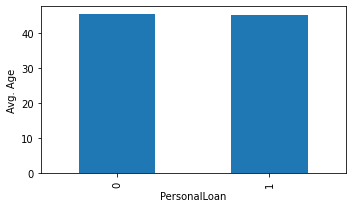

In [123]:
ax = bank_df.groupby('PersonalLoan').mean().Age.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. Age')

plt.tight_layout()
plt.show()

<ipython-input-124-17335cdc6d32>:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, 'Avg. Income')

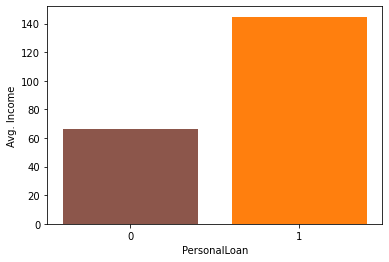

In [124]:
dataForPlot = bank_df.groupby('PersonalLoan').mean().Income
fig, ax = plt.subplots()

ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('PersonalLoan')
ax.set_ylabel('Avg. Income')

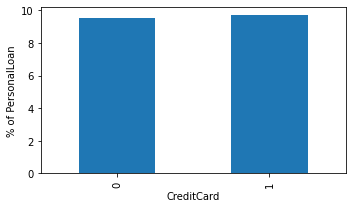

In [125]:
dataForPlot = bank_df.groupby('CreditCard').mean()['PersonalLoan'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of PersonalLoan')

plt.tight_layout()
plt.show()

<ipython-input-126-bae9fca15549>:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([0, 1], False)


Text(0, 0.5, '% of PersonalLoan')

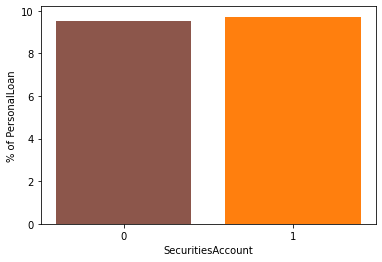

In [126]:
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('SecuritiesAccount')
ax.set_ylabel('% of PersonalLoan')

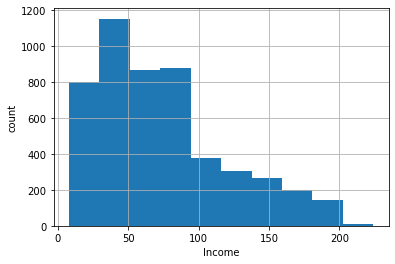

In [127]:
ax = bank_df.Income.hist()
ax.set_xlabel('Income')
ax.set_ylabel('count')

plt.show()

<ipython-input-128-8c84bea72b96>:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([1, 2], False)


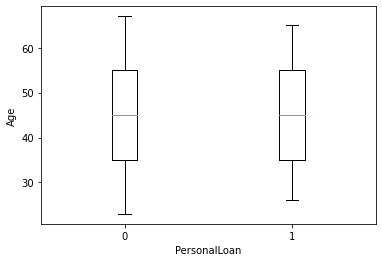

In [128]:
dataForPlot = [list(bank_df[bank_df.PersonalLoan==0].Age), list(bank_df[bank_df.PersonalLoan==1].Age)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2], False)
ax.set_xticklabels([0, 1])
ax.set_xlabel('PersonalLoan')
ax.set_ylabel('Age')

plt.show()

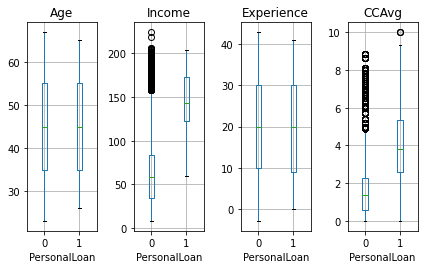

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=4)
bank_df.boxplot(column='Age', by='PersonalLoan', ax=axes[0])
bank_df.boxplot(column='Income', by='PersonalLoan', ax=axes[1])
bank_df.boxplot(column='Experience', by='PersonalLoan', ax=axes[2])
bank_df.boxplot(column='CCAvg', by='PersonalLoan', ax=axes[3])
for ax in axes:
    ax.set_xlabel('PersonalLoan')
plt.suptitle('')
plt.tight_layout()

plt.show()

<AxesSubplot:>

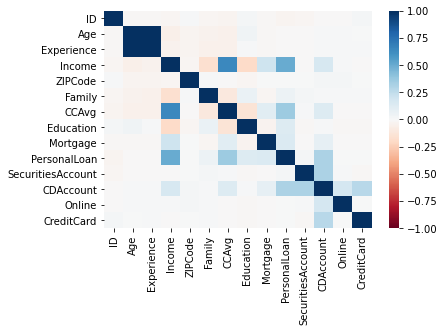

In [130]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

### Data Preparation

In [131]:
bank_df.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


As per the correlation table, we can remove the predictors listed below that are negatively correlated or have close to a zero correlation with the PersonalLoan outcome:

    - ID
    - Age
    - Experience
    - ZIPCode
    - Online
    - CreditCard

### We generate two datasets X and y from the original dataset. This is the first run without and manipulations to the original dataset. We are fitting the Decision Tree and Random Forest models.

X is the dataset that contains the independent (predictive) variables. We drop the variables that are not useful. 

y is the dataset that contains the outcome variable "outcome".

In [132]:
X = bank_df.drop(['ID', 'Age', 'Experience','ZIPCode', 'Online', 'CreditCard','PersonalLoan'], axis=1)
y = bank_df['PersonalLoan']

In [133]:
X.head(5)

,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount
0,49,4,1.6,1,0,1,0
1,34,3,1.5,1,0,1,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


### Imported train_test_split function from sklearn.model_selection module
The original dataset is divided into training and test datasets.  The test dataset contains twenty-five percent of the original data.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Imported DecisionTreeClassifier function from sklearn.tree module

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
classifier = DecisionTreeClassifier()

### Building a classification tree using the training sets  

In [137]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Generated the predicted y value for the test set using the decision tree classification tree built
### Also, generated the predicted y value for the train set using the decision tree classification tree built

In [138]:
pred = classifier.predict(X_test)
train_data_pred = classifier.predict(X_train)

### Imported accuracy_score function from sklearn.metrics module

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Evaluated the accuracy of the decision tree model by comparing the predicted y values with the actual y values in the test set 

In [140]:
accuracy = accuracy_score(y_test, pred)

In [141]:
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.9848


In [142]:
print("Test Data: ")
print(classification_report(y_test, pred))

Test Data: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1144
           1       0.92      0.90      0.91       106

    accuracy                           0.98      1250
   macro avg       0.96      0.94      0.95      1250
weighted avg       0.98      0.98      0.98      1250



In [143]:
print("Train Data: ")
print(classification_report(y_train, train_data_pred))

Train Data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3376
           1       1.00      1.00      1.00       374

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



### Estimating the training and test error using the train and test data - Decision Tree

In [144]:
from sklearn.metrics import mean_absolute_error

In [145]:
train_data_test_error = mean_absolute_error(y_train, train_data_pred)
test_data_test_error = mean_absolute_error(y_test, pred)
print("Train Data Test Error: ", train_data_test_error)
print("Test Data Test Error: ", test_data_test_error)

Train Data Test Error:  0.0
Test Data Test Error:  0.0152


### Generated variable yhat to store predicted y values for the original dataset

In [146]:
# bank_df['yhat'] = classifier.predict(X)

### Exported the dataset with predicted value

In [147]:
# pd.DataFrame(bank_df).to_csv("Personal_Loan_Predictions_Decision_Tree.csv")

### Imported RandomForestClassifier function from sklearn.ensemble package

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
random_classifier = RandomForestClassifier()

### Build a random forest classification tree using the training sets

In [162]:
random_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Generated the predicted y value for the test set using the random forest classification tree built

In [163]:
pred = random_classifier.predict(X_test)
train_data_pred = random_classifier.predict(X_train)

### Imported accuracy_score function from sklearn.metrics package

In [164]:
from sklearn.metrics import accuracy_score

### Evaluated the accuracy of the random forest classification tree model by comparing the predicted y values with the actual y values in the test set

In [165]:
accuracy = accuracy_score(y_test, pred)

In [166]:
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.9864


In [167]:
print("Test Data: ")
print(classification_report(y_test, pred))

Test Data: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1144
           1       0.94      0.90      0.92       106

    accuracy                           0.99      1250
   macro avg       0.97      0.95      0.96      1250
weighted avg       0.99      0.99      0.99      1250



In [168]:
print("Train Data: ")
print(classification_report(y_train, train_data_pred))

Train Data: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3376
           1       1.00      1.00      1.00       374

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



### Estimating the training and test error using the train and test data - Random Forest

In [169]:
train_data_test_error = mean_absolute_error(y_train, train_data_pred)
test_data_test_error = mean_absolute_error(y_test, pred)
print("Train Data Test Error: ", train_data_test_error)
print("Test Data Test Error: ", test_data_test_error)

Train Data Test Error:  0.0
Test Data Test Error:  0.0136


### Generated variable yhat to store predicted y values for the original dataset

In [158]:
# bank_df['yhat'] = random_classifier.predict(X)

### Export the dataset with predicted value

In [159]:
# pd.DataFrame(bank_df).to_csv("Personal_Loan_Predictions_Random_Forest.csv")